# Meta learning momentum parameter
Can we learn/meta-learn the momentum parameter using the gradient of the loss during training?


Later on, can we learn/meta-learn all the hardcoded parameters? maybe even look ahead of the optimization using meta-learning of the past history of weights?

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
%run imports.py

In [9]:
import util

In [12]:
# ds = cifar10.CIFAR10()
ds = mnist.MNIST()
model = mnist.Network

In [13]:
net = model()

In [50]:
import torch.functional.sgd

ModuleNotFoundError: No module named 'torch.functional.sgd'; 'torch.functional' is not a package

In [141]:
def train_sgd(net, accu, lr=1e-2, momentum=0):
    m = None
    for epoch_idx in range(5):
        for x, y in tqdm(ds.dl_train):
            yp = net(x)
            loss = ds.loss_fn(yp, y)
            
            for pi in net.parameters():
                pi.grad = None
                
            loss.backward()
            
            if m is None:
                m = [pi.grad.detach() for pi in net.parameters()]
            else:
                m = [momentum*mi+pi.grad.detach() for mi, pi in zip(m, net.parameters())]
                
            for pi, mi in zip(net.parameters(), m):
                pi.data -= lr*mi
            
            # print(loss.item())
            accu.append(loss_batch=loss.item(), momentum=momentum)
            
def train_meta(net, accu, lr=1e-2, momentum=0, lr_momentum=1e-2):
    
    momentum = torch.tensor(momentum).float().requires_grad_()
    
    vp = torch.cat([pi.flatten().detach() for pi in net.parameters()]).detach()
    m = torch.zeros_like(vp)
    g = torch.zeros_like(vp)
    for epoch_idx in range(5):
        for x, y in tqdm(ds.dl_train):
            m = momentum*m.detach() + g
                
            v = vp.detach() - lr*m
            
            nn.utils.vector_to_parameters(v, net.parameters())
            yp = net(x)
            loss = ds.loss_fn(yp, y)
            
            for pi in net.parameters():
                pi.grad = None
            momentum.grad = None
                
            loss.backward()
            g = torch.cat([pi.grad.flatten().detach() for pi in net.parameters()]).detach()
            
            if v.grad_fn is not None:
                v.backward(g)
                mg = momentum.grad
                # print(mg.item())
                momentum = (momentum.detach() - lr_momentum*mg).requires_grad_()
            
            vp = v
                
            # momentum -= lr_momentum*(-lr*np.sum([torch.sum(mi) for mi in m]))
            
            print(loss.item(), momentum)
            accu.append(loss_batch=loss.item(), momentum=momentum.item())
            
            
# data = {'sgdm': util.Accumulator(), 'meta': util.Accumulator()}
# torch.manual_seed(0)
# train_sgd(model(), data['sgdm'], lr=1e-2, momentum=0.01)
data['meta'] = util.Accumulator()
torch.manual_seed(0)
train_meta(model(), data['meta'], lr=1e-2, momentum=0.01, lr_momentum=1e-2)


  0%|          | 0/60 [00:00<?, ?it/s]

2.3080012798309326 tensor(0.0100, requires_grad=True)
2.311157703399658 tensor(0.0100, requires_grad=True)
2.303990364074707 tensor(0.0122, requires_grad=True)
2.3074874877929688 tensor(0.0145, requires_grad=True)
2.305107831954956 tensor(0.0162, requires_grad=True)
2.30715012550354 tensor(0.0185, requires_grad=True)
2.306190252304077 tensor(0.0206, requires_grad=True)
2.305449962615967 tensor(0.0231, requires_grad=True)
2.3039889335632324 tensor(0.0255, requires_grad=True)
2.3008389472961426 tensor(0.0269, requires_grad=True)
2.3017728328704834 tensor(0.0287, requires_grad=True)
2.3007516860961914 tensor(0.0301, requires_grad=True)
2.3039379119873047 tensor(0.0325, requires_grad=True)
2.3018736839294434 tensor(0.0340, requires_grad=True)
2.302468776702881 tensor(0.0368, requires_grad=True)
2.30556321144104 tensor(0.0388, requires_grad=True)
2.3062243461608887 tensor(0.0406, requires_grad=True)
2.3073675632476807 tensor(0.0432, requires_grad=True)
2.3013603687286377 tensor(0.0442, requ

  0%|          | 0/60 [00:00<?, ?it/s]

2.2970144748687744 tensor(0.1222, requires_grad=True)
2.3038835525512695 tensor(0.1243, requires_grad=True)
2.298095226287842 tensor(0.1262, requires_grad=True)
2.304884672164917 tensor(0.1281, requires_grad=True)
2.30043363571167 tensor(0.1303, requires_grad=True)
2.303689956665039 tensor(0.1325, requires_grad=True)
2.299813747406006 tensor(0.1347, requires_grad=True)
2.3012235164642334 tensor(0.1366, requires_grad=True)
2.2986273765563965 tensor(0.1379, requires_grad=True)
2.3005259037017822 tensor(0.1401, requires_grad=True)
2.2996788024902344 tensor(0.1406, requires_grad=True)
2.3050918579101562 tensor(0.1427, requires_grad=True)
2.3035757541656494 tensor(0.1450, requires_grad=True)
2.304243326187134 tensor(0.1476, requires_grad=True)
2.3025548458099365 tensor(0.1494, requires_grad=True)
2.2991318702697754 tensor(0.1516, requires_grad=True)
2.3001656532287598 tensor(0.1529, requires_grad=True)
2.301955223083496 tensor(0.1550, requires_grad=True)
2.304945230484009 tensor(0.1573, req

  0%|          | 0/60 [00:00<?, ?it/s]

2.299961566925049 tensor(0.2527, requires_grad=True)
2.305410623550415 tensor(0.2558, requires_grad=True)
2.3005213737487793 tensor(0.2582, requires_grad=True)
2.299126148223877 tensor(0.2613, requires_grad=True)
2.300949811935425 tensor(0.2639, requires_grad=True)
2.2992568016052246 tensor(0.2666, requires_grad=True)
2.2990684509277344 tensor(0.2688, requires_grad=True)
2.2993359565734863 tensor(0.2712, requires_grad=True)
2.2946836948394775 tensor(0.2727, requires_grad=True)
2.2983062267303467 tensor(0.2746, requires_grad=True)
2.298225164413452 tensor(0.2764, requires_grad=True)
2.302006721496582 tensor(0.2784, requires_grad=True)
2.2989823818206787 tensor(0.2812, requires_grad=True)
2.2982897758483887 tensor(0.2826, requires_grad=True)
2.2972283363342285 tensor(0.2855, requires_grad=True)
2.2996304035186768 tensor(0.2883, requires_grad=True)
2.2967183589935303 tensor(0.2913, requires_grad=True)
2.297677993774414 tensor(0.2936, requires_grad=True)
2.3007967472076416 tensor(0.2964, r

  0%|          | 0/60 [00:00<?, ?it/s]

2.295717477798462 tensor(0.4407, requires_grad=True)
2.295621633529663 tensor(0.4448, requires_grad=True)
2.297818899154663 tensor(0.4487, requires_grad=True)
2.2994136810302734 tensor(0.4533, requires_grad=True)
2.298053026199341 tensor(0.4584, requires_grad=True)
2.2957653999328613 tensor(0.4628, requires_grad=True)
2.296264171600342 tensor(0.4680, requires_grad=True)
2.293649435043335 tensor(0.4720, requires_grad=True)
2.2942955493927 tensor(0.4763, requires_grad=True)
2.296604871749878 tensor(0.4808, requires_grad=True)
2.2984158992767334 tensor(0.4848, requires_grad=True)
2.294501781463623 tensor(0.4887, requires_grad=True)
2.296504020690918 tensor(0.4948, requires_grad=True)
2.2950878143310547 tensor(0.4993, requires_grad=True)
2.2945871353149414 tensor(0.5040, requires_grad=True)
2.294041633605957 tensor(0.5092, requires_grad=True)
2.291372776031494 tensor(0.5136, requires_grad=True)
2.295581340789795 tensor(0.5185, requires_grad=True)
2.2936174869537354 tensor(0.5230, requires_

  0%|          | 0/60 [00:00<?, ?it/s]

2.2859280109405518 tensor(1.0101, requires_grad=True)
2.2820053100585938 tensor(1.0502, requires_grad=True)
2.283231258392334 tensor(1.0968, requires_grad=True)
2.2833101749420166 tensor(1.1540, requires_grad=True)
2.2780508995056152 tensor(1.2263, requires_grad=True)
2.272507905960083 tensor(1.3261, requires_grad=True)
2.269975423812866 tensor(1.4724, requires_grad=True)
2.2676990032196045 tensor(1.6582, requires_grad=True)
2.2559597492218018 tensor(1.9865, requires_grad=True)
2.2318813800811768 tensor(2.5265, requires_grad=True)
2.2373123168945312 tensor(0.3616, requires_grad=True)
2.2528038024902344 tensor(-9.7643, requires_grad=True)
2.301452875137329 tensor(-9.7038, requires_grad=True)
3788.3037109375 tensor(89838.2500, requires_grad=True)
1.5075589493175019e+28 tensor(-4.1987e+25, requires_grad=True)
nan tensor(nan, requires_grad=True)
nan tensor(nan, requires_grad=True)
nan tensor(nan, requires_grad=True)
nan tensor(nan, requires_grad=True)
nan tensor(nan, requires_grad=True)
na

In [ ]:
loss = L(w)
g = loss.backward()

wp = update(w, g, m)


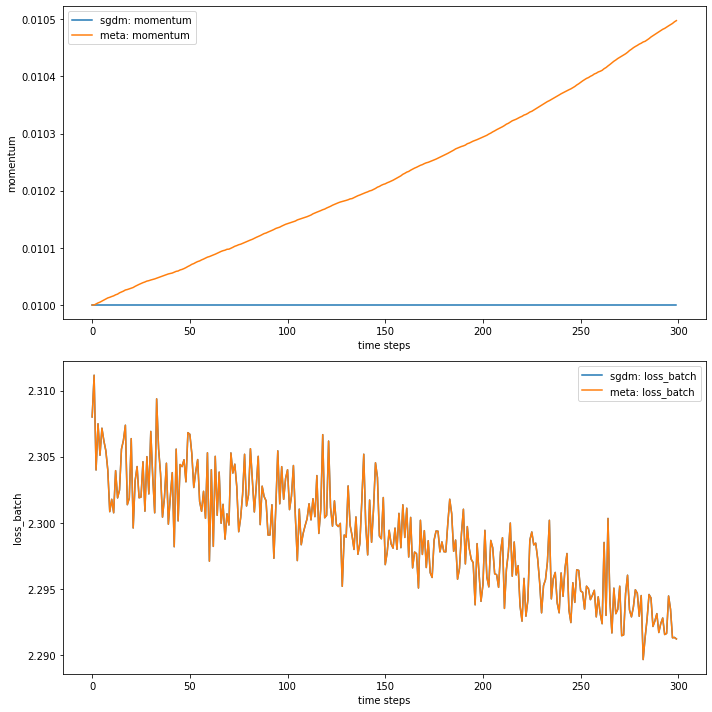

In [136]:
plt.figure(figsize=(10,10))
util.plot_accumulators(data)